<a href="https://colab.research.google.com/github/ewst22ParkSY/ESAA11_YB/blob/ESAA11_YB/ESAA_YB_WEEK6_1_transcript.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###앙상블 학습(Ensemble Learning)

####앙상블 학습 개요
>여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법


####앙상블 학습의 목표
> 다양한 분류기의 예측 결과를 결합함으로써 단일 분류기보다 신뢰성이 높은 예측값을 얻는 것!

앙상블 알고리즘의 대표격
- 랜덤 포레스트
- 그래디언트 부스팅
- XGboost
- LightGBM
- 스태킹(Stacking)

앙상블 학습의 특징
> 쉽고 편하면서도 강력한 성능을 보유

앙상블 학습의 유형
- 보팅(Voting)
- 배깅(Bagging)
- 부스팅(Boosting)


보팅과 배깅: 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식
<br>
다른 점
> 보팅: 일반적으로 서로 **다른** 알고리즘을 가진 분류기를 결합하는 것
<br>
> 배깅: 각각의 분류기가 모두 **같은** 유형의 알고리즘 기반이지만 데이터 샘플링을 서로 **다르게** 가져가면서 학습을 수행 (ex. 랜덤 포레스트 알고리즘)


도식화
<br>
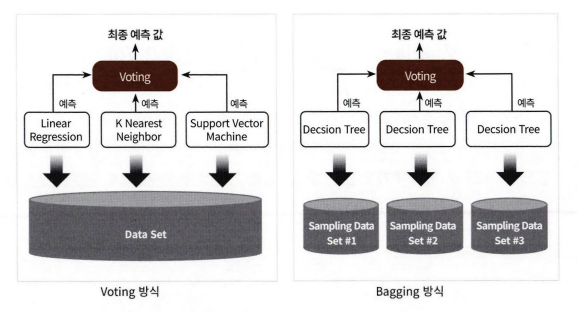

보팅 분류기
> 선형 회귀, K 최근접 이웃, 서포트 벡터 머신이라는 3개의 ML 알고리즘이 같은 데이터 세트에 대해 학습하고 예측한 결과를 갖고 보팅을 통해 최종 예측 결과를 선정하는 방식

배깅 분류기
> 단일 ML 알고리즘(결정 트리)으로 여러 분류기가 학습으로 개별 예측.
> 부트스트래핑(Bootstrapping) 분할방식: 개별 분류기에 할당된 학습 데이터는 원본 학습 데이터를 샘플링해 추출 > 개별 Classifier에게 데이터를 샘플링해서 추출하는 방식
> 배깅 앙상블: 개별 분류기가 부트 스트래핑 방식으로 샘플리오딘 데이터 세트에 대해 학습을 통해 개별적인 예측을 수행한 결과를 보팅을 통해서 최종 예측 결과를 선정하는 방식

부스팅
> 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에게는 가중치(weight)를 부여, 학습과 예측 진행

스태킹
> 여러 가지 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어서 다른 모델(메타 모델)로 재학습시켜 결과를 예측하는 방법



### 보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)

- 하드 보팅 분류 ( 다수결 원칙과 비슷 )
> 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정

- 소프트 보팅 (일반적인 보팅 방법)
> 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정

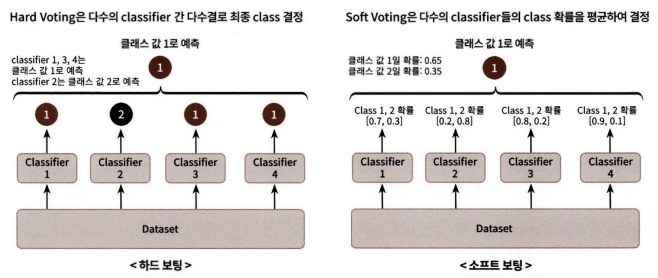

### 보팅 분류기(Voting Classifier)
사이킷런은 보팅 방식의 앙상블을 구현한 VotingClassifier 클래스 제공

In [1]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


VotingClassifier 주요 생성 인자
- estimators: 리스트 값으로 보팅에 사용될 여러 개의 Classifier 객체들을 튜플 형식으로 입력받음
- voting: 'hard'시 하드 보팅, 'soft'시 소프트 보팅 방식을 적용. (디폴트 'hard')



In [3]:
# 다른 개별 모델은 로지스틱 회귀와 KNN임.
lr_clf = LogisticRegression(solver = 'liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier( estimators = [('LR',lr_clf),('KNN',knn_clf)], voting = 'soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size = 0.2, random_state = 156)

# VotingClassifier 학습/예측/평가.
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.956140
LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


고정된 데이터 세트에서 단일 ML알고리즘이 뛰어난 성능을 발휘하더라더 현실 세계는 다양한 변수와 예측이 어려운 규칙으로 됨.

다양한 관점을 가진 알고리즘이 서로 결합해 더 나은 성능을 실제 환경에서 끌어낼 수 있음.

그렇기에 ML 모델의 성능은 어떻게 높은 유연성을 가지고 현실에 대처할 수 있는가? 가 중요한 평가요소

### 랜덤 포레스트

배깅(bagging)
> 앞에서 소개한 보팅과는 다르게, 같은 알고리즘으로 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘.
> 대표적인 알고리즘: 랜덤 포레스트

랜덤 포레스트
- 기반 알고리즘은 결정 트리
> 결정 트리의 쉽고 직관적인 장점을 그대로 가지고 있음. (물론 랜덤 포레스트뿐만 아니라 부스팅 기반의 다양한 앙상블 알고리즘 역시 대부분 결정 트리 알고리즘을 기반 알고리즘으로 채택)

- 개별적인 분류기의 기반 알고리즘은 결정 트리이지만 개별 트리가 학습하느 데이터 세트는 전체 데이터에서 일부가 중첩되게 샘플링된 데이터 세트. (부트스트래핑 분할 방식)




### 랜덤 포레스트 결정 과정

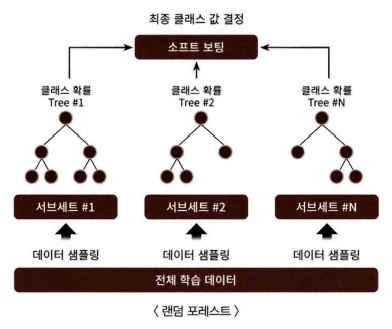

In [6]:
#이전에 해둔 get_human_dataset() 가져오기

def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
  feature_dup_df = feature_dup_df.reset_index()
  new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1]) if x[1]>0 else x[0], axis=1)

  new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
  return new_feature_name_df


import pandas as pd
def get_human_dataset():
    # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('/content/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스크 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()

    # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩, 칼럼명은 feature_name 적용
    X_train = pd.read_csv('/content/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('/content/X_test.txt', sep='\s+', names=feature_name)

    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
    y_train = pd.read_csv('/content/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('/content/y_test.txt', sep='\s+', header=None, names=['action'])

    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset()를 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test  = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

#교재와 답이 다르다

랜덤 포레스트 정확도: 0.9253


### 랜덤 포레스트 하이퍼 파라미터 튜닝

트리 기반의 앙상블 알고리즘의 단점
- 하이퍼 파라미터가 너무 많고, 그로 인해 튜닝을 위한 시간이 많이 소모됨.
- 많은 시간을 소모했음에도 튜닝 후 예측 성능이 크게 향상되는 경우가 많지 않음.

랜덤포레스트는 파라미터가 적은 편. 결정 트리에서 사용되는 하이퍼 파라미터와 같은 파라미터가 대부분이기 때문

- n_estimators: 랜덤 포레스트에서 결정 트리의 개수 지정
- max_features: 결정 트리에 사용된 max_feature 파라미터와 동일.(하지만 랜덤 포레스트의 트리를 분할하는 피처를 참조할 때는 전체 피처가 아닌 sqrt(전체 피처 개수)만큼 참조.)
- max_depth, min_samples_test, min_samples_split: 결정 트리에서 과적합을 개선하기 위해 사용되는 파라미터가 랜덤 포레스트에도 똑같이 적용될 수 있음.

In [9]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [8,16,24],
    'min_samples_leaf':[1,6,12],
    'min_samples_split':[2,8,16]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(n_estimators = 100, random_state=0, n_jobs =-1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv=2, n_jobs =-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 2}
최고 예측 정확도: 0.9165


In [10]:
rf_clf1 = RandomForestClassifier(n_estimators=100, min_samples_leaf = 6, max_depth=16, min_samples_split=2, random_state=0)

rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9260


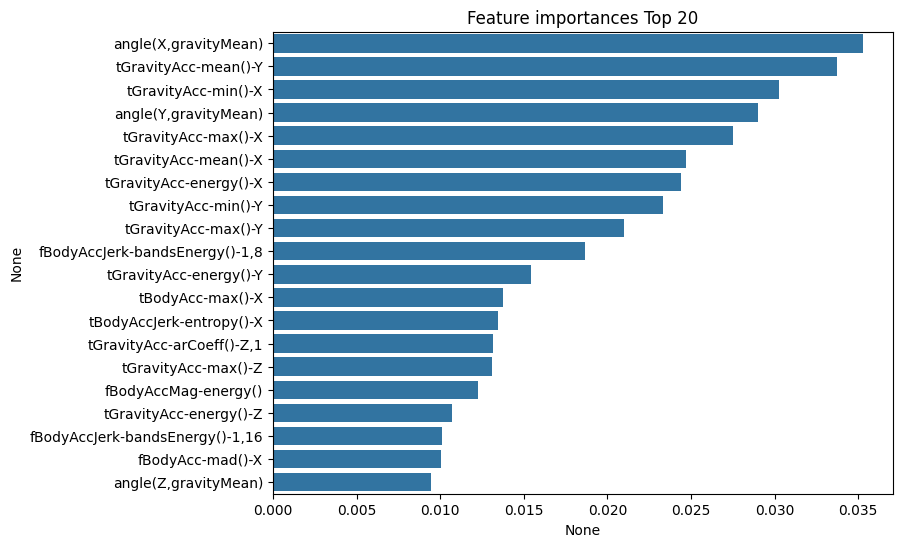

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

###GBM(Gradient Boosting Machine)

####GBM의 개요 및 실습
부스팅 알고리즘: 여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식.

부스팅의 대표적인 구현
- AdaBoost: 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘

< 에이다부스트 학습 진행 단계 >
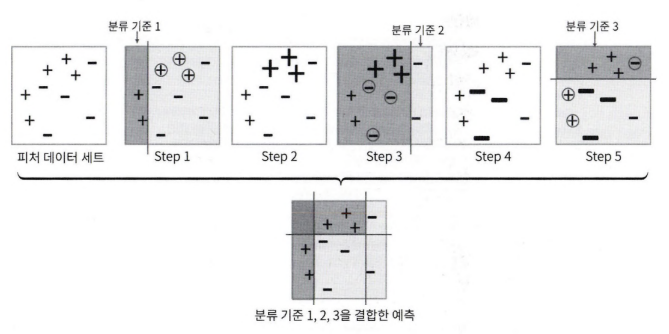


- 그래디언트 부스트: 에이다 부스트와 유사하나, 가중치 업데이트를 경사 하강법(Gradient Descent)을 이용하는 것이 큰 차이.
> CART 기반의 다른 알고리즘과 마찬가지로 분류는 물론이고 회귀도 가능.

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도:{0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.1f}초'.format(time.time() - start_time))

GBM 정확도:0.9386
GBM 수행 시간: 1393.2초


### GBM 하이퍼 파라미터 소개
- loss: 경사 하강법에서 사용할 비용함수 지정. 특별한 함수가 없을시 기본값인 'deviance'를 그대로 적용
- learning_rate: GBM이 학습을 진행할 떄마다 적용하는 학습률. 0~1사이로 지정가능하며 기본값은 0.1
- n_estimators: weak learner의 개수.
- subsample: weak learner가 학습에 사용하는 데이터의 샘플링 비율

### XGBoost(eXtra GradientBoost)

XGBoost
> 트리 기반의 앙상블 학습에서 가장 각광받고 있는 알고리즘 중 하나
> GBM에 기반하고 있지만 GBM의 단점인 느린 수행 시간 및 과적합 규제(Regularization) 부재 등의 문제 해결

주요 장점
- 뛰어난 예측 성능
- GBM 대비 빠른 수행 시간
- 과적합 규제(Regularization)
- Tree pruning
- 자체 내장된 교차 검증
- 결손값 자체 처리

핵심 라이브러리는 C/C++로 작성'

초반에는 사이킷런 기반의 메서드와 함께 사용할 수 없었으나, 현재는 XGBClassifier와 XGVRegressor라는 사이킷런 래퍼 클래스를 제공.

In [14]:
pip install xgboost==1.5.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.5/173.5 MB 3.8 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.1
    Uninstalling xgboost-2.1.1:
      Successfully uninstalled xgboost-2.1.1


In [16]:
import xgboost as xgb
from xgboost import XGBClassifier

### 파이썬 래퍼 XGBoost 하이퍼 파라미터

XGBoost는 GBM과 유사한 하이퍼 파라미터를 동이랗게 가지고 있으며, 여기에 조기 중단(early stopping), 과적합 규제를 위한 하이퍼 파라미터 추가됨.

파이썬 래퍼 XGBoost 모듈과 사이킷런 래퍼 XGBoost모듈의 일부 하이퍼 파라미터는 약간 다르므로 주의 필요!

파이썬 래퍼 XGBoost 하이퍼 파라미터
- 일반 파라미터: 일반적으로 실행 시 스레드의 개수나 silent 모드 등의 선택을 위한 파라미터. 디폴트 값을 바꾸는 경우 거의 X
> 주요 파라미터: booster, silent, nthread

- 부스터 파라미터: 트리 최적화, 부스팅, regularization등과 관련한 파라미터
> eta, num_boost_rounds, min_child_weight[default=1], gamma[default=0, alias: min_split_loss], max_depth[default=6], scale_pos_weight[default=1]

- 학습 태스크 파라미터: 학습 수행 시의 객체 함수, 평가를 위한 지표 등을 설정하는 파라미터
> objectiv, binary:logistic, multi:softmax, multi:softprob, eval_metric

대부분의 하이퍼 파라미터는 Booster 파라미터에 속함.

과적합 문제가 심각할 시 적용할 수 있는 것
- eta 값을 낮춤. (대신 num_round 혹은 n_estimators 높여주기.)
- max_depth 값을 낮춤
- min_child_weight 값을 높임
- gamma 값을 높임
- subsample과 colsample_bytree 조정하는 것도 트리가 너무 복잡하게 생성되는 것을 막아 과적합 문제에 도움이 될 수 있음.

<br>

XGBoost의 성능 향상 기능
- 조기 중단: n_estimators에 지정한 부스팅 반복 횟수에 도달하지 않더라도 예측 오류가 더 이상 개선되지 않으면 반복을 끝까지 수행하지 않고 중지해 수행시간 개선

In [17]:
import xgboost

print(xgboost.__version__)

1.5.0


파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측

In [18]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset =load_breast_cancer()
features = dataset.data
labels = dataset.target

cancer_df = pd.DataFrame(data = features, columns = dataset.feature_names)
cancer_df['target']=labels
cancer_df.head(3)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [19]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64


In [20]:
# cancer_df 에서 DataFrame과 Label용 Series 객체 추출
# 맨 마지막 칼럼이 Label이므로, Feature용 DF는 cancer_df의 첫번째~마지막 두번째 칼럼까지를 :-1 슬라이싱 추출
X_features = cancer_df.iloc[:,:-1]
y_label = cancer_df.iloc[:,-1]

# 전체 데이터 중 80%는 학습용, 20%는 테스트용 데이터로 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

# 위에서 만든 X_train, y_train을 다시 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


XGBoost와 사이킷런의 차이
> XGBoost만의 전용 데이터 객체인 DMatrix를 사용한다는 점. > 따라서 전용 데이터 객체인 DMatrix로 생성하여 모델에 입력해줘야 함.

DMatrix는 넘파이, DataFrame, Series외에 libsvm txt 포맷 파일, xgboost 이진 버퍼 파일을 파라미터로 입력받아 변환할 수 있음.


In [24]:
# 만약 구버전 XGBoost에서 DataFrame으로 DMatrix 생성이 안될 경우 X_train.values로 넘파이 변환.
# 학습, 검증, 테스트용 DMatrix를 생성.
dtr = xgb.DMatrix(data=X_tr.values, label=y_tr)
dval = xgb.DMatrix(data=X_val.values, label=y_val)
dtest = xgb.DMatrix(data=X_test.values, label=y_test)


XGBoost의 하이퍼 파라미터는 주로 딕셔너리 형태로 입력


In [21]:
params = {'max_depth': 3,
          'eta': 0.05,
          'objective':'binary:logistic',
          'eval_metric':'logloss'
          }
num_rounds = 4006

In [25]:
# 학습 데이터 셋은 'train' 또는 평가 데이터 셋은 'eval'로 명기.
eval_list = [(dtr, 'train'),(dval,'eval')]  #또는 eval_list = [(dval,'eval')] 만 명기해도 무방.

# 하이퍼 파라미터와 early stopping 파라미터를 train()함수의 파라미터로 전달
xgb_model = xgb.train(params=params, dtrain=dtr, num_boost_round=num_rounds,
                      early_stopping_rounds=50, evals=eval_list )

[0]	train-logloss:0.65016	eval-logloss:0.66183
[1]	train-logloss:0.61131	eval-logloss:0.63609
[2]	train-logloss:0.57563	eval-logloss:0.61144
[3]	train-logloss:0.54310	eval-logloss:0.59204
[4]	train-logloss:0.51323	eval-logloss:0.57329
[5]	train-logloss:0.48447	eval-logloss:0.55037
[6]	train-logloss:0.45796	eval-logloss:0.52929
[7]	train-logloss:0.43436	eval-logloss:0.51534
[8]	train-logloss:0.41150	eval-logloss:0.49718
[9]	train-logloss:0.39027	eval-logloss:0.48154
[10]	train-logloss:0.37128	eval-logloss:0.46990
[11]	train-logloss:0.35254	eval-logloss:0.45474
[12]	train-logloss:0.33528	eval-logloss:0.44229
[13]	train-logloss:0.31893	eval-logloss:0.42961
[14]	train-logloss:0.30439	eval-logloss:0.42065
[15]	train-logloss:0.29000	eval-logloss:0.40958
[16]	train-logloss:0.27651	eval-logloss:0.39887
[17]	train-logloss:0.26389	eval-logloss:0.39050
[18]	train-logloss:0.25210	eval-logloss:0.38254
[19]	train-logloss:0.24123	eval-logloss:0.37393
[20]	train-logloss:0.23076	eval-logloss:0.36789
[2

In [31]:
#테스트 데이터 세트에 예측 수행

pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정하여 List 객체인 preds 에 저장
preds = [1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:', preds[:10])

predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.845 0.008 0.68  0.081 0.975 0.999 0.998 0.998 0.996 0.001]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix( y_test, pred)
  accuracy = accuracy_score(y_test , pred)
  precision = precision_score(y_test , pred)
  recall = recall_score(y_test , pred)
  f1 = f1_score(y_test,pred)
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차 행렬')
  print(confusion)
  print('정확도: {0: .4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


In [38]:
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[34  3]
 [ 2 75]]
정확도:  0.9561, 정밀도: 0.9615, 재현율: 0.9740, F1: 0.9677, AUC:0.9937


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

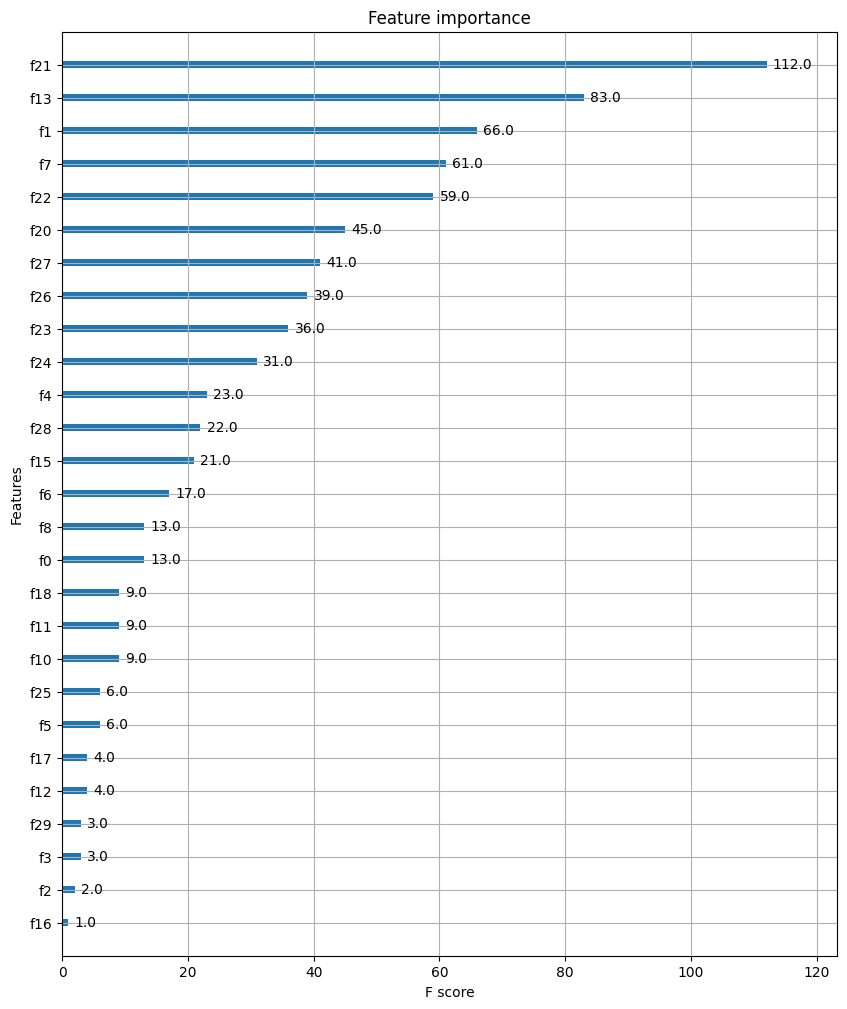

In [39]:
#xgboost 패키지에 내장된 시각화 기능 수행

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

파이썬 래퍼 XGBoost는 교차 검증 수행 후 최적 파라미터를 구할 수 있는 방법을 cv() API로 제공.

xgb.cv 반환값은 DataFrame 형태.

### 사이킷런 래퍼 XGBoost의 개요 및 적용

xgboost 모듈에서 사용하던 네이티브 하이퍼 파라미터의 변경점

- eta > learning_rate
- sub_sample > subsample
- lambda > reg_lambda
- alpha = reg_alpha



In [51]:
pip install --upgrade pandas

In [60]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

# Warning 메시지를 없애기 위해 eval_metrics 값을 XGBClassifier 생성 인자로 입력.
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3,
                            eval_metric="logloss")
xgb_wrapper.fit(X_train.values, y_train.values, verbose=True)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

In [41]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도:  0.9649, 정밀도: 0.9620, 재현율: 0.9870, F1: 0.9744, AUC:0.9954


In [59]:
#사이킷런 래퍼 XGBoost에서 조기 중단 수행

from xgboost import XGBClassifier
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3)
evals = [(X_tr.values, y_tr.values), (X_val.values, y_val.values)]
xgb_wrapper.fit(X_tr.values, y_tr.values, early_stopping_rounds=50, eval_metric="logloss",
                eval_set=evals, verbose=True)
ws50_preds = xgb_wrapper.predict(X_test)
ws50_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52929
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	validation_0-logloss:0.37128	validation_1-logloss:0.46990
[11]	validation_0-logloss:0.35254	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.33528	validation_1-logloss:0.44229
[13]	validation_0-logloss:0.31893	validation_1-logloss:0.42961
[14]	validation_0-logloss:0.30439	validation_1-logloss:0.42065
[15]	validation_0-logloss:0.29000	validation_1-logloss:0.40958
[1

In [57]:
get_clf_eval(y_test, ws50_preds, ws50_pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도:  0.9561, 정밀도: 0.9615, 재현율: 0.9740, F1: 0.9677, AUC:0.9933


조기 중단 값을 너무 급격하게 줄이면 예측 성능이 저하될 우려가 큼.

In [62]:
# early_stopping_rounds를 10으로 설정하고 재학습.
xgb_wrapper.fit(X_tr.values, y_tr.values, early_stopping_rounds=10,
                eval_metric="logloss", eval_set=evals, verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52929
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	validation_0-logloss:0.37128	validation_1-logloss:0.46990
[11]	validation_0-logloss:0.35254	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.33528	validation_1-logloss:0.44229
[13]	validation_0-logloss:0.31893	validation_1-logloss:0.42961
[14]	validation_0-logloss:0.30439	validation_1-logloss:0.42065
[15]	validation_0-logloss:0.29000	validation_1-logloss:0.40958
[1

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

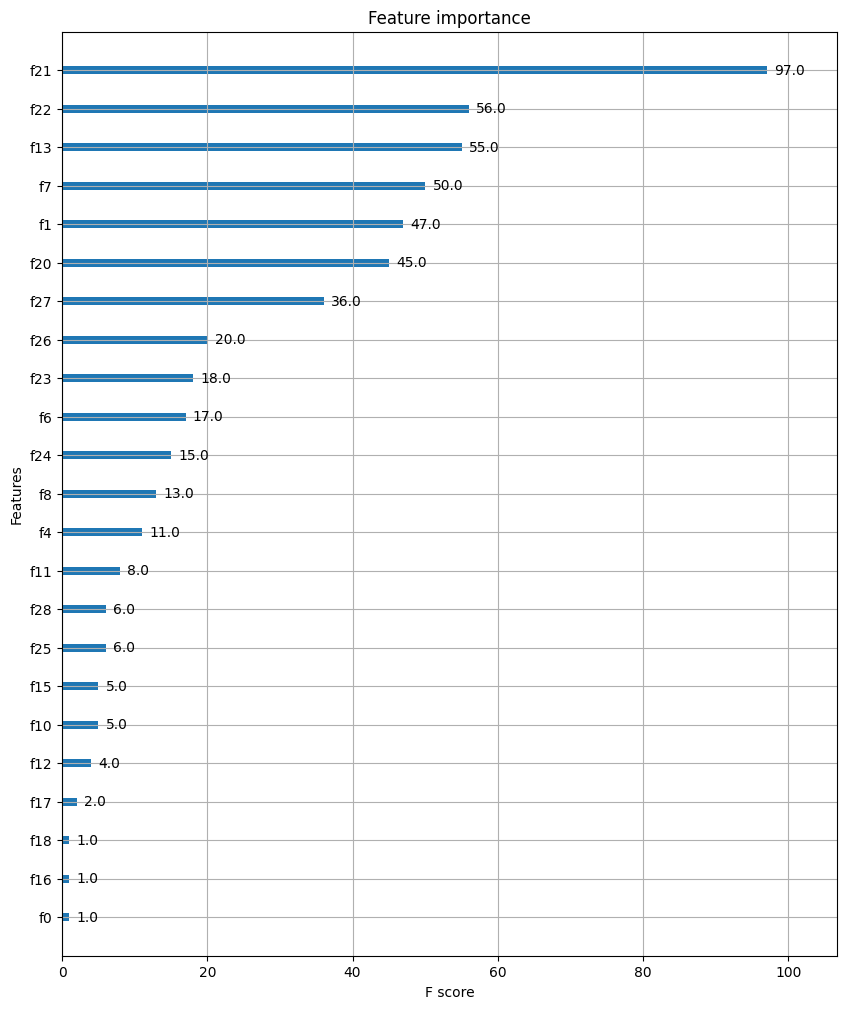

In [63]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
# 사이킷런 래퍼 클래스를 입력해도 무방.
plot_importance(xgb_wrapper, ax=ax)